<a href="https://colab.research.google.com/github/molinacle/desafio_latam/blob/main/Desaf%C3%ADo_Latam_Desaf%C3%ADo_7_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DESAFÍO LATAM - DESAFÍO 7**
---

*   ALUMNO: SEBASTIÁN MOLINA
*   MODULO: MACHINE LEARNING
*   CARRERA: DATA SCIENCE

In [131]:
# Importación de Librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.preprocessing import StandardScaler

In [132]:
# Leer el archivo
data = pd.read_excel("imdb_anime.xlsx")

# Conocer cuántas filas y columnas tiene el dataset
data.shape

(45717, 13)

In [133]:
# Descripción estadística de los datos
data.describe()

,Title,Genre,User Rating,Number of Votes,Runtime,Year,Summary,Stars,Certificate,Metascore,Gross,Episode,Episode Title
count,45717,45717,25009.0,25009,32549,45591,23547,13676,28694,341,25009,45717,34910
unique,9851,201,87.0,3033,196,740,22588,6460,33,60,3033,3,33779
top,Doraemon,"Animation, Action, Adventure",7.6,7,24 min,(1969– ),A young teen who surfs the skies with his ref ...,"Nobuyo Ôyama,Noriko Ohara,Michiko Nomura,Kazuy...",TV-14,74,7,1,Episode #1.4
freq,2758,13568,1270.0,567,9636,2399,25,765,10033,21,567,34909,12


In [134]:
# Información básica del dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45717 entries, 0 to 45716
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Title            45717 non-null  object
 1   Genre            45717 non-null  object
 2   User Rating      25009 non-null  object
 3   Number of Votes  25009 non-null  object
 4   Runtime          32549 non-null  object
 5   Year             45591 non-null  object
 6   Summary          23547 non-null  object
 7   Stars            13676 non-null  object
 8   Certificate      28694 non-null  object
 9   Metascore        341 non-null    object
 10  Gross            25009 non-null  object
 11  Episode          45717 non-null  object
 12  Episode Title    34910 non-null  object
dtypes: object(13)
memory usage: 4.5+ MB


In [135]:
# Revisar valores faltantes
def calcular_porcentaje_nulos(dataframe):
    null_percentage = dataframe.isnull().mean() * 100
    return null_percentage.sort_values(ascending=False)

# Uso de la función con un dataframe
porcentaje_nulos = calcular_porcentaje_nulos(data)
print(porcentaje_nulos)

Metascore          99.254107
Stars              70.085526
Summary            48.493996
User Rating        45.296061
Number of Votes    45.296061
Gross              45.296061
Certificate        37.235602
Runtime            28.803290
Episode Title      23.638909
Year                0.275609
Title               0.000000
Genre               0.000000
Episode             0.000000
dtype: float64


In [136]:
# Revisar valores duplicados
def encontrar_duplicados(dataframe):
    # Identificar registros duplicados
    duplicados = dataframe.duplicated(keep=False)  # keep=False marca todos los duplicados como True
    total_duplicados = duplicados.sum()

    return total_duplicados

# Uso de la función con el dataset procesado
total_duplicados = encontrar_duplicados(data)

print(f"Total de registros duplicados encontrados: {total_duplicados}")

Total de registros duplicados encontrados: 1747


En base al análisis inicial del dataset, se identifican los siguientes puntos a resolver:
- Todas las variables son de tipo object por lo que tendremos que transformar varias de ellas a numéricas.
- Se identifica gran cantidad de valores faltantes, por lo se debe establecer un umbral, eliminar aquellas columnas que lo superen y tratar las columnas que no lo superen.
- Hay cerca de 2.000 registros duplicados, por lo que tendremos que eliminarlos antes de continuar con el análisis.

In [137]:
# Eliminar registros duplicados
data = data.drop_duplicates()

In [138]:
# Elimina la columna 'Metascore' debido a un exceso de valores faltantes
data = data.drop(columns=['Metascore'])

# Convierte 'User Rating' a numérico, fuerza errores a NaN
data['User Rating'] = pd.to_numeric(data['User Rating'], errors='coerce')

# Convierte las columnas 'Number of Votes' y 'Gross' a numérico, fuerza errores a NaN
data['Number of Votes'] = pd.to_numeric(data['Number of Votes'], errors='coerce')
data['Gross'] = pd.to_numeric(data['Gross'], errors='coerce')

# Extrae la parte numérica de 'Runtime' y lo convierte a numérico
data['Runtime'] = data['Runtime'].str.extract('(\d+)').astype(float)

# Extrae el año inicial de 'Year' y lo convierte a numérico
data['Year'] = data['Year'].str.extract('(\d{4})').astype(float)

# Reemplaza cualquier valor no numérico con Nan y luego lo convierte a número entero
data['Episode'] = pd.to_numeric(data['Episode'], errors='coerce').fillna(0).astype(int)
data['Episode'] = data['Episode'].astype(int)

# Muestra un resumen estadístico de los datos transformados
data_describe_converted = data.describe()

data_describe_converted

,User Rating,Number of Votes,Runtime,Year,Gross,Episode
count,24183.000000,2.418300e+04,31764.000000,34857.000000,2.418300e+04,44843.000000
mean,7.213840,1.749073e+03,26.667485,1995.620421,1.749073e+03,0.777713
std,1.007996,2.286184e+04,23.643874,14.142169,2.286184e+04,0.415787
min,1.000000,5.000000e+00,1.000000,1934.000000,5.000000e+00,0.000000
25%,6.700000,2.100000e+01,23.000000,1985.000000,2.100000e+01,1.000000
50%,7.300000,7.800000e+01,24.000000,1996.000000,7.800000e+01,1.000000
75%,7.800000,3.520000e+02,25.000000,2006.000000,3.520000e+02,1.000000
max,9.900000,1.162284e+06,780.000000,2024.000000,1.162284e+06,1.000000


In [139]:
# Identificando valores atípicos usando el IQR (Rango Intercuartílico) para las columnas numéricas

# Define una función para detectar valores atípicos usando el IQR
def detect_outliers_iqr(data, column_name):
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column_name] < lower_bound) | (data[column_name] > upper_bound)]

# Aplica la detección de valores atípico para las columnas relevantes
outliers_user_rating = detect_outliers_iqr(data, 'User Rating')
outliers_number_of_votes = detect_outliers_iqr(data, 'Number of Votes')
outliers_gross = detect_outliers_iqr(data, 'Gross')
outliers_runtime = detect_outliers_iqr(data, 'Runtime')

# Muestra la información de los valores atípicos
outliers_info = {
    'User Rating Outliers': len(outliers_user_rating),
    'Number of Votes Outliers': len(outliers_number_of_votes),
    'Gross Outliers': len(outliers_gross),
    'Runtime Outliers': len(outliers_runtime)
}

outliers_info

{'User Rating Outliers': 813,
 'Number of Votes Outliers': 3326,
 'Gross Outliers': 3326,
 'Runtime Outliers': 8488}

In [140]:
# Transformación logarítmica en columnas numéricas sesgadas para manejar valores atípicos
data['Number of Votes_log'] = data['Number of Votes'].apply(lambda x: np.log(x + 1) if x > 0 else 0)
data['Gross_log'] = data['Gross'].apply(lambda x: np.log(x + 1) if x > 0 else 0)
data['Runtime_log'] = data['Runtime'].apply(lambda x: np.log(x + 1) if x > 0 else 0)

# Manejo de valores faltantes completando con mediana para columnas numéricas y 'Unknown' para columnas categóricas
data['User Rating'].fillna(data['User Rating'].median(), inplace=True)
data['Number of Votes'].fillna(data['Number of Votes'].median(), inplace=True)
data['Gross'].fillna(data['Gross'].median(), inplace=True)
data['Runtime'].fillna(data['Runtime'].median(), inplace=True)
data['Summary'].fillna('Unknown', inplace=True)
data['Stars'].fillna('Unknown', inplace=True)
data['Episode Title'].fillna('Unknown', inplace=True)

In [141]:
data.head()

,Title,Genre,User Rating,Number of Votes,Runtime,Year,Summary,Stars,Certificate,Gross,Episode,Episode Title,Number of Votes_log,Gross_log,Runtime_log
0,One Piece,"Animation, Action, Adventure",8.9,187689.0,24.0,1999.0,Follows the adventures of Monkey D. Luffy and ...,"Mayumi Tanaka,Laurent Vernin,Akemi Okamura,Ton...",TV-14,187689.0,0,Unknown,12.142547,12.142547,3.218876
1,Teenage Mutant Ninja Turtles: Mutant Mayhem,"Animation, Action, Adventure",7.4,28895.0,99.0,NaN,The film follows the Turtle brothers as they w...,Unknown,PG,28895.0,0,Unknown,10.271458,10.271458,4.605170
2,The Super Mario Bros. Movie,"Animation, Adventure, Comedy",7.1,189108.0,92.0,NaN,A plumber named Mario travels through an under...,Unknown,PG,189108.0,0,Unknown,12.150079,12.150079,4.532599
3,Attack on Titan,"Animation, Action, Adventure",9.1,434457.0,24.0,2013.0,After his hometown is destroyed and his mother...,"Josh Grelle,Bryce Papenbrook,Yûki Kaji,Yui Ish...",TV-MA,434457.0,0,Unknown,12.981855,12.981855,3.218876
4,Jujutsu Kaisen,"Animation, Action, Adventure",8.5,82909.0,24.0,2020.0,A boy swallows a cursed talisman - the finger ...,"Junya Enoki,Yûichi Nakamura,Adam McArthur,Yuma...",TV-MA,82909.0,0,Unknown,11.325511,11.325511,3.218876


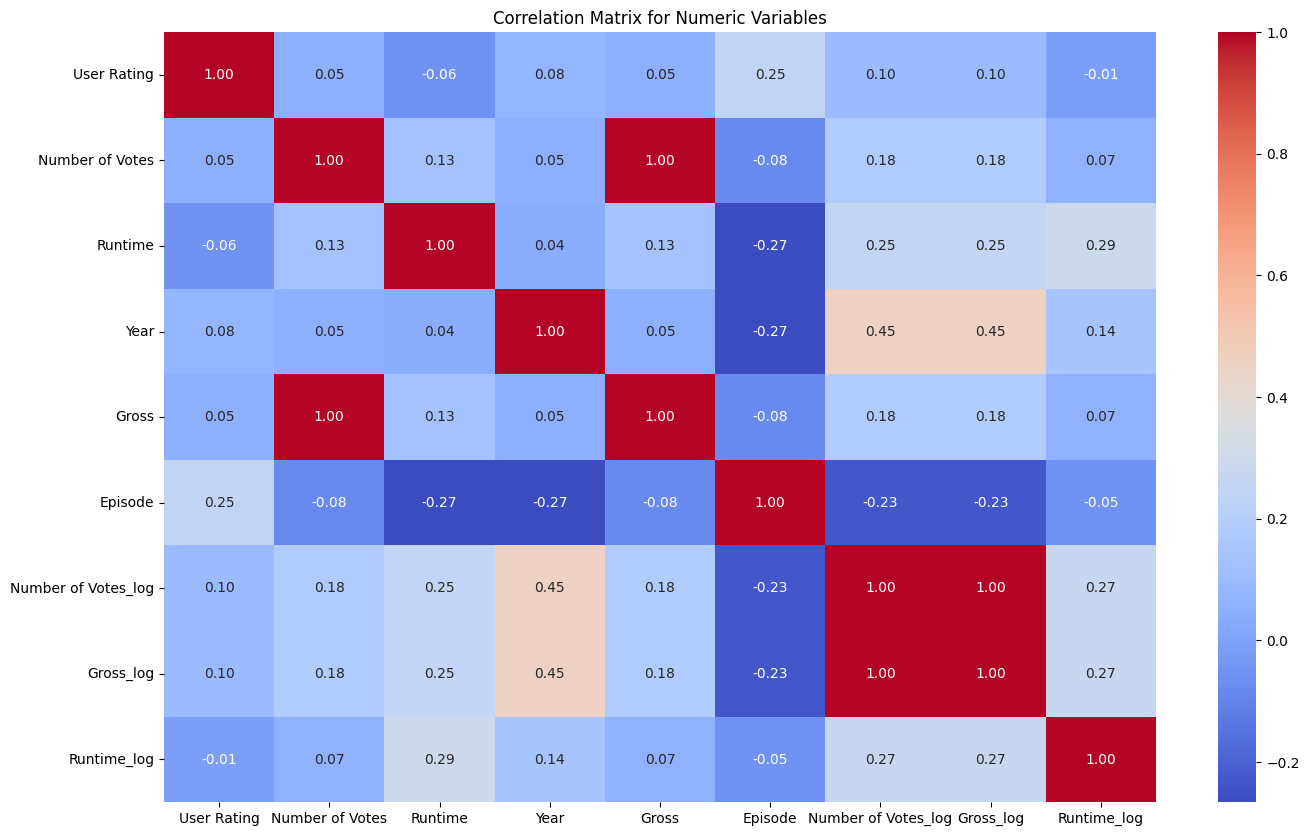

In [142]:
# Seleccionar solo las columnas de tipo 'int' o 'float64'
numerical_columns = data.select_dtypes(include=['int', 'float64'])

# Calcula la matriz de correlación para columnas numéricas
correlation_matrix = numerical_columns.corr()

# Grafica la matriz de correlación
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Numeric Variables')
plt.show()

La columna Episode contiene un valor inesperado, 'Episode', además de los valores binarios esperados (0 y 1). Procederé a limpiar estos datos y convertir la columna a entero.

In [143]:
# Converte todos los valores de la columna 'Runtime' a string
data['Runtime'] = data['Runtime'].astype(str)

# Converte todos los valores de la columna 'Year' a string
data['Year'] = data['Year'].astype(str)

In [144]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# Función para preprocesar el dataset
def preprocess_imdb_anime(data):
    # Elimina las columnas con excesivos valores faltantes
    data = data.drop(columns=['Metascore'], errors='ignore')

    # Convierte las columnas correspondientes a numéricas
    data['User Rating'] = pd.to_numeric(data['User Rating'], errors='coerce')
    data['Number of Votes'] = pd.to_numeric(data['Number of Votes'], errors='coerce')
    data['Gross'] = pd.to_numeric(data['Gross'], errors='coerce')
    data['Runtime'] = data['Runtime'].str.extract('(\d+)').astype(float)
    data['Year'] = data['Year'].str.extract('(\d{4})').astype(float)
    data['Episode'] = pd.to_numeric(data['Episode'], errors='coerce').fillna(0).astype(int)

    # Transformación logarítmica de columnas numéricas sesgadas para manejar valores atípicos
    data['Number of Votes_log'] = data['Number of Votes'].apply(lambda x: np.log(x + 1) if x > 0 else 0)
    data['Gross_log'] = data['Gross'].apply(lambda x: np.log(x + 1) if x > 0 else 0)
    data['Runtime_log'] = data['Runtime'].apply(lambda x: np.log(x + 1) if x > 0 else 0)

    # Manejo de valores faltantes completando con mediana para columnas numéricas y 'Unknown' para columnas categóricas
    data['User Rating'].fillna(data['User Rating'].median(), inplace=True)
    data['Number of Votes'].fillna(data['Number of Votes'].median(), inplace=True)
    data['Gross'].fillna(data['Gross'].median(), inplace=True)
    data['Runtime'].fillna(data['Runtime'].median(), inplace=True)
    data['Summary'].fillna('Unknown', inplace=True)
    data['Stars'].fillna('Unknown', inplace=True)
    data['Episode Title'].fillna('Unknown', inplace=True)

    return data

# Aplica la función de preprocesamiento a los datos
preprocessed_data = preprocess_imdb_anime(data.copy())

# Selección de variables mediante el método de filtro de correlación (basado en filtros)
correlation_threshold = 0.2
correlated_features = correlation_matrix.index[abs(correlation_matrix["User Rating"]) > correlation_threshold].tolist()

# Forward Selection (Wrapper-based method)
X = preprocessed_data.drop(columns=['User Rating', 'Title', 'Genre', 'Summary', 'Stars', 'Episode Title', 'Certificate'])
y = preprocessed_data['User Rating']

# Separando el dataset para el proceso forward selection
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Elimina filas con Nan y/o valores infinitos de los datos de entrenamiento
Remove rows with NaN or infinite values in the training data
X_train = X_train.replace([np.inf, -np.inf], np.nan).dropna()
y_train = y_train[X_train_clean.index]

def forward_selection(data, target):
    initial_features = data.columns.tolist()
    best_features = []
    while len(initial_features) > 0:
        remaining_features = list(set(initial_features) - set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features + [new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if min_p_value < 0.05:
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

selected_features_forward = forward_selection(X_train, y_train)

correlated_features, selected_features_forward

(['User Rating', 'Episode'],
 ['Number of Votes_log',
  'Gross_log',
  'Episode',
  'Year',
  'Gross',
  'Number of Votes'])